<p style="text-align:center">
    <a href="https://www.wits.ac.za/" target="_blank">
    <img src="	https://www.wits.ac.za/media/wits-university-style-assets/images/wits-logo.svg" width="200" alt="University of witwatersrand Logo"  />
    </a>
</p>

## Completed by: Neo Mmusi

# FINE 50030 - Assignment 2: Regression Analysis
### Date: May 20, 2025

This notebook contains a comprehensive analysis of MSCI World Style Indices using regression analysis.

## 1. Setup and Data Loading
First, we'll import the required libraries and load our data.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [14]:
# Read the data
df = pd.read_excel('MSCI_Style_Data.xlsx')
df.set_index('Unnamed: 0', inplace=True)
df.index.name = 'Date'

In [15]:
# Display basic information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-12-31 to 2024-11-30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Growth    60 non-null     float64
 1   DY        60 non-null     float64
 2   Big       60 non-null     float64
 3   Med       60 non-null     float64
 4   Low Vol   60 non-null     float64
 5   Momentum  60 non-null     float64
 6   Quality   60 non-null     float64
 7   Small     60 non-null     float64
 8   Value     60 non-null     float64
 9   MSCI      60 non-null     float64
dtypes: float64(10)
memory usage: 5.2 KB
None


In [16]:
print("\nFirst few rows:")
display(df.head())


First few rows:


,Growth,DY,Big,Med,Low Vol,Momentum,Quality,Small,Value,MSCI
Date,,,,,,,,,,
2019-12-31,0.029704,0.031060,0.031640,0.023916,0.016456,0.025065,0.036560,0.035074,0.030979,0.030341
2020-01-31,0.017019,-0.026991,-0.004648,-0.011575,0.019834,0.026588,0.005822,-0.027601,-0.028807,-0.005805
2020-02-29,-0.073319,-0.090686,-0.082803,-0.090591,-0.080077,-0.071484,-0.077071,-0.091677,-0.095491,-0.084095
2020-03-31,-0.099398,-0.113779,-0.122431,-0.178331,-0.098395,-0.101543,-0.086394,-0.207155,-0.166771,-0.131686
2020-04-30,0.128067,0.081779,0.107601,0.121504,0.073290,0.102870,0.112010,0.134723,0.088347,0.109793


## 2. Initial Data Analysis

In [17]:
# Calculate and display summary statistics
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,Growth,DY,Big,Med,Low Vol,Momentum,Quality,Small,Value,MSCI
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.013700,0.007392,0.011973,0.009140,0.006191,0.011928,0.013294,0.009157,0.009077,0.011519
std,0.057725,0.043758,0.050761,0.057840,0.038431,0.051367,0.051898,0.062819,0.051675,0.051542
min,-0.118982,-0.113779,-0.122431,-0.178331,-0.098395,-0.113079,-0.090592,-0.207155,-0.166771,-0.131686
25%,-0.022714,-0.027070,-0.023538,-0.027228,-0.019722,-0.024247,-0.025308,-0.027553,-0.027691,-0.023980
50%,0.021010,0.012625,0.021978,0.014811,0.017220,0.015820,0.027454,0.009400,0.018696,0.019683
75%,0.054231,0.031477,0.044098,0.046167,0.031111,0.045295,0.050232,0.049505,0.045964,0.045554
max,0.128067,0.118136,0.125276,0.143578,0.073290,0.102870,0.112010,0.154209,0.150736,0.128278


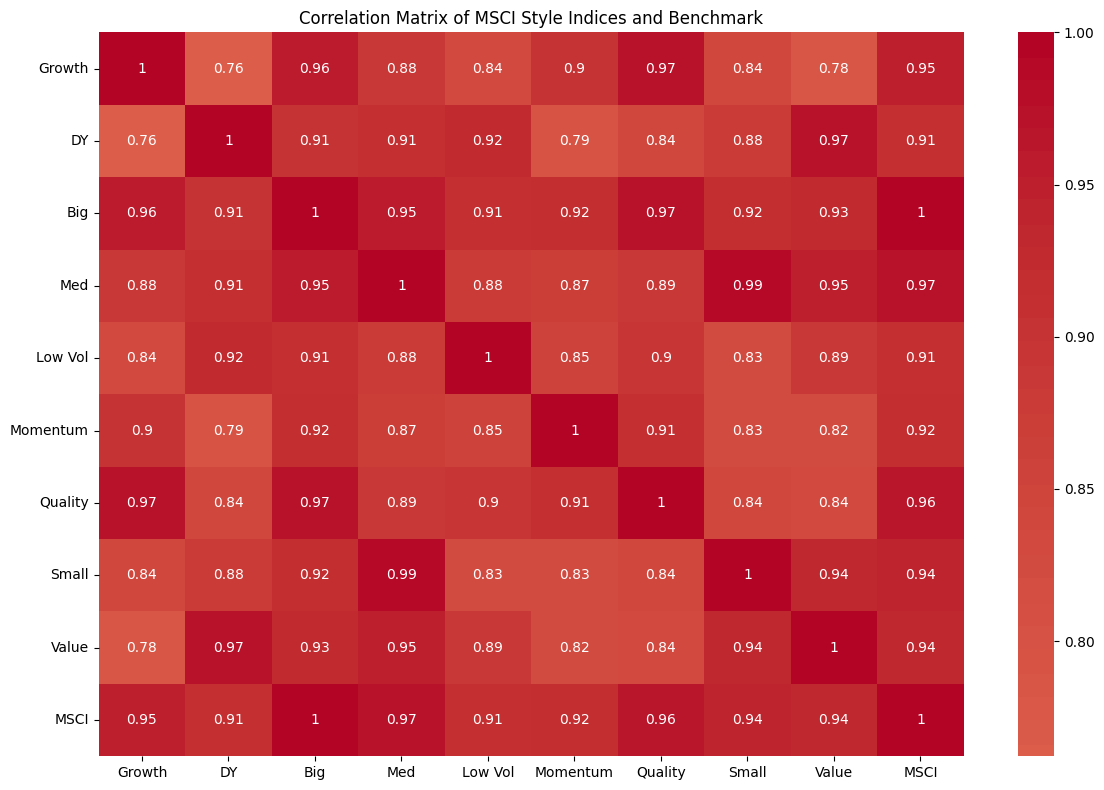

In [18]:
# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of MSCI Style Indices and Benchmark')
plt.tight_layout()
plt.show()

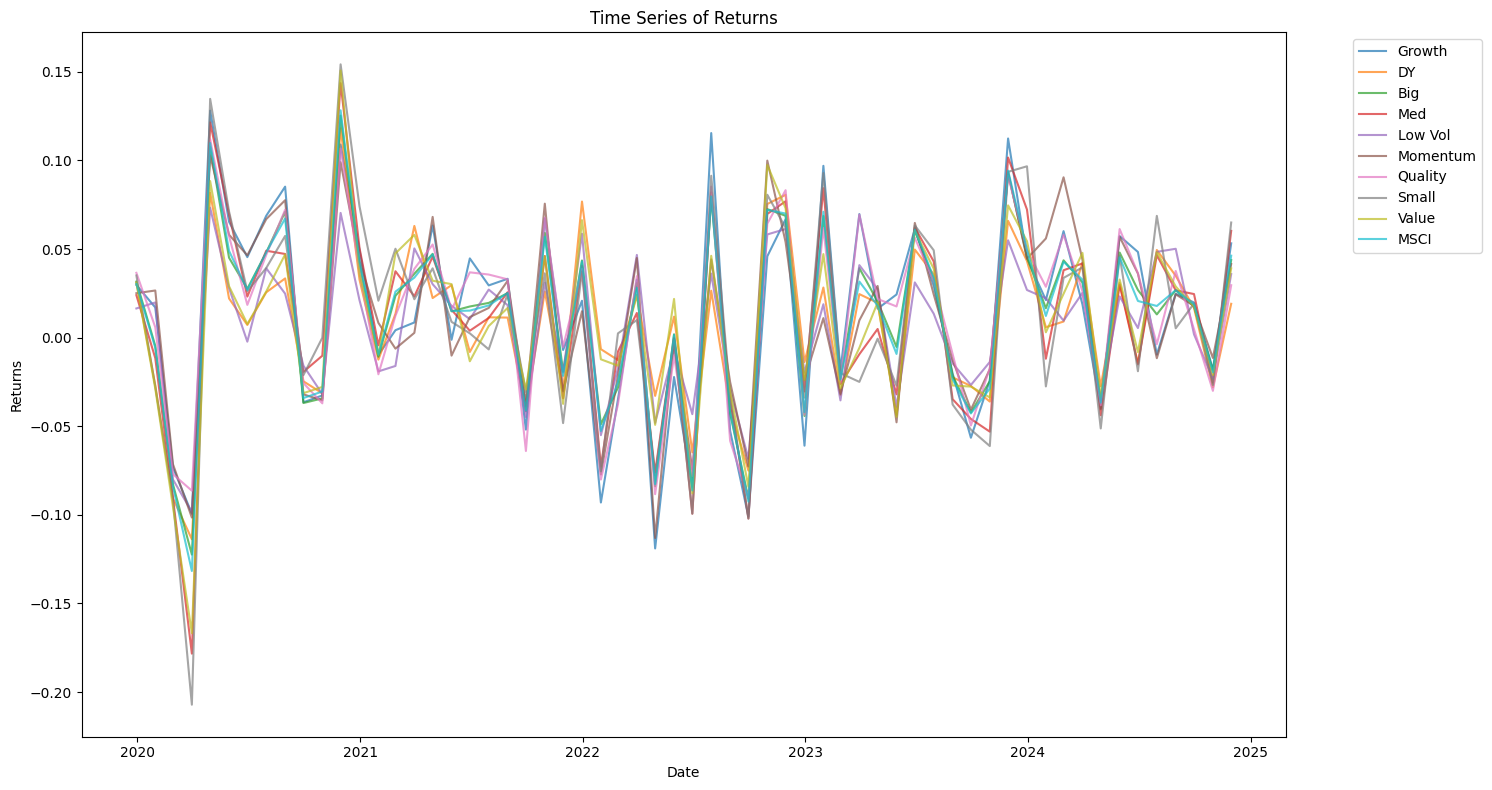

In [19]:
# Create time series plot
plt.figure(figsize=(15, 8))
for column in df.columns:
    plt.plot(df.index, df[column], label=column, alpha=0.7)
plt.title('Time Series of Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 3. Stationarity Tests
We'll use the Augmented Dickey-Fuller test to check for stationarity.

In [20]:
def test_stationarity(series, series_name):
    result = adfuller(series)
    print(f'\nStationarity Test for {series_name}')
    print('='*50)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    is_stationary = result[1] < 0.05
    print(f'Series is {"stationary" if is_stationary else "non-stationary"} at 5% significance level')

# Test stationarity for each series
for column in df.columns:
    test_stationarity(df[column], column)


Stationarity Test for Growth
ADF Statistic: -8.0695
p-value: 0.0000
Critical values:
	1%: -3.5464
	5%: -2.9119
	10%: -2.5937
Series is stationary at 5% significance level

Stationarity Test for DY
ADF Statistic: -7.9521
p-value: 0.0000
Critical values:
	1%: -3.5464
	5%: -2.9119
	10%: -2.5937
Series is stationary at 5% significance level

Stationarity Test for Big
ADF Statistic: -8.3835
p-value: 0.0000
Critical values:
	1%: -3.5464
	5%: -2.9119
	10%: -2.5937
Series is stationary at 5% significance level

Stationarity Test for Med
ADF Statistic: -7.9974
p-value: 0.0000
Critical values:
	1%: -3.5464
	5%: -2.9119
	10%: -2.5937
Series is stationary at 5% significance level

Stationarity Test for Low Vol
ADF Statistic: -7.4364
p-value: 0.0000
Critical values:
	1%: -3.5485
	5%: -2.9128
	10%: -2.5941
Series is stationary at 5% significance level

Stationarity Test for Momentum
ADF Statistic: -7.7771
p-value: 0.0000
Critical values:
	1%: -3.5464
	5%: -2.9119
	10%: -2.5937
Series is stationary 

## 4. Normality Tests
We'll use the Shapiro-Wilk test and create Q-Q plots to test for normality.


Normality Test for Growth
Shapiro-Wilk test:
Statistic: 0.9798
p-value: 0.4195


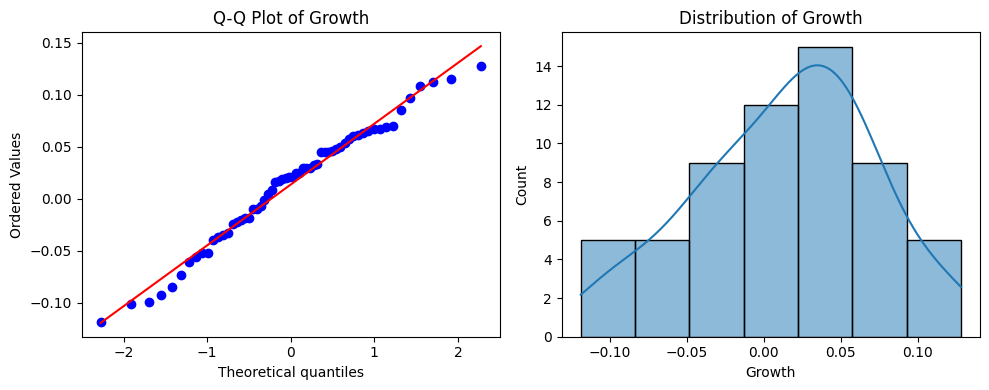


Normality Test for DY
Shapiro-Wilk test:
Statistic: 0.9818
p-value: 0.5087


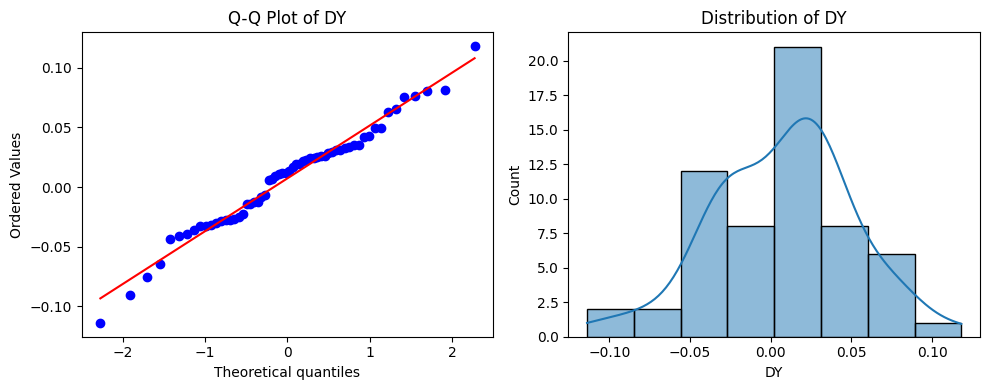


Normality Test for Big
Shapiro-Wilk test:
Statistic: 0.9754
p-value: 0.2643


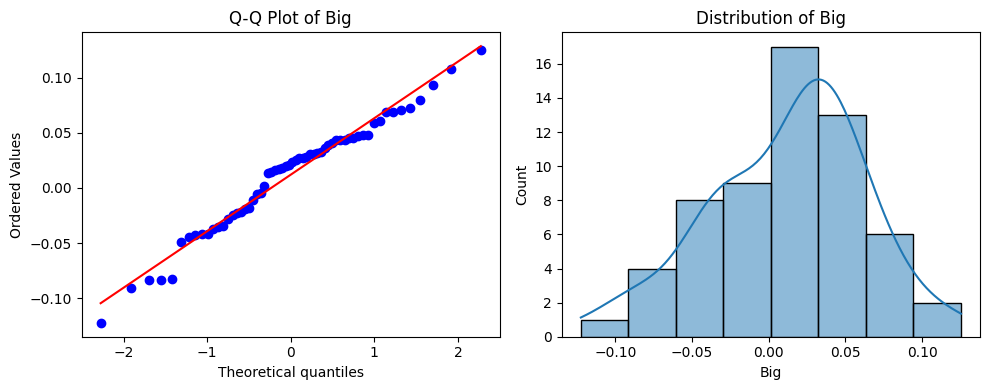


Normality Test for Med
Shapiro-Wilk test:
Statistic: 0.9807
p-value: 0.4583


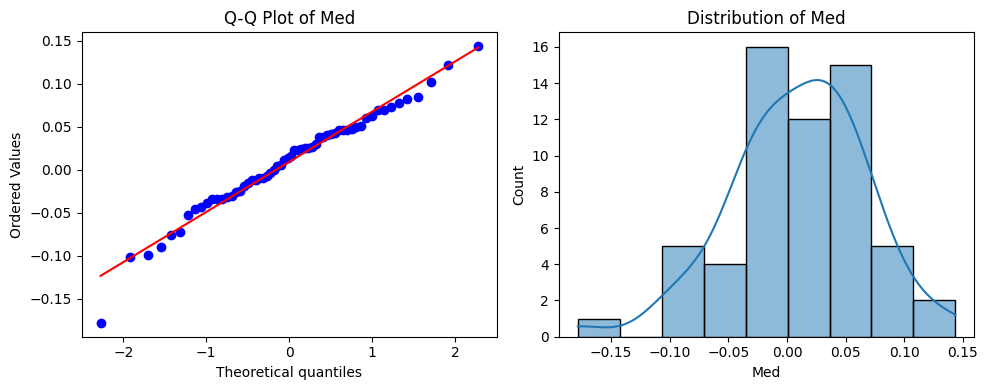


Normality Test for Low Vol
Shapiro-Wilk test:
Statistic: 0.9696
p-value: 0.1390


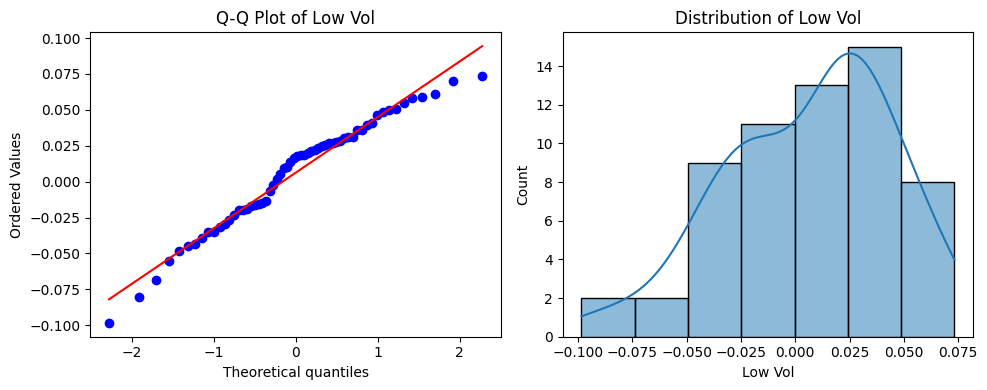


Normality Test for Momentum
Shapiro-Wilk test:
Statistic: 0.9809
p-value: 0.4685


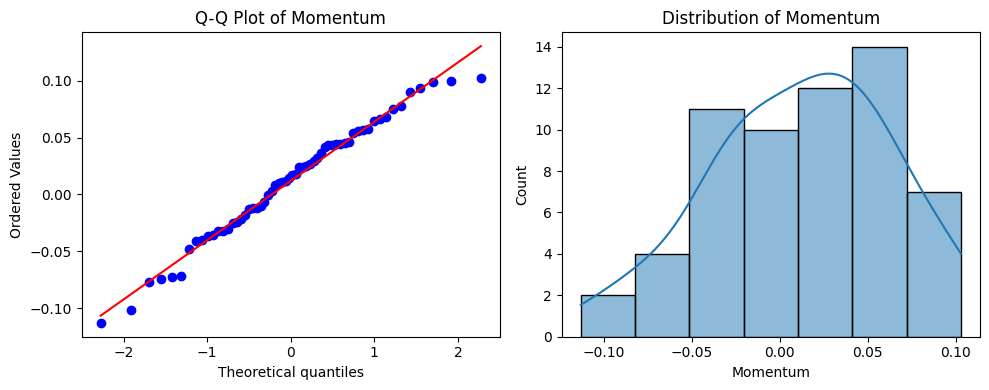


Normality Test for Quality
Shapiro-Wilk test:
Statistic: 0.9621
p-value: 0.0594


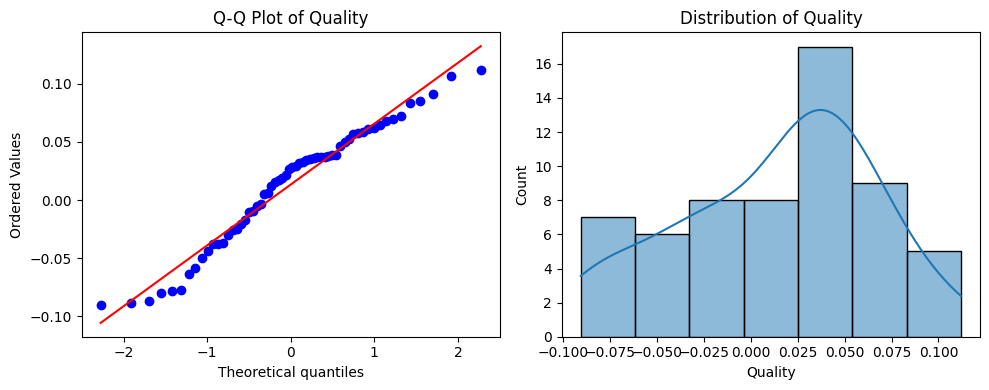


Normality Test for Small
Shapiro-Wilk test:
Statistic: 0.9769
p-value: 0.3112


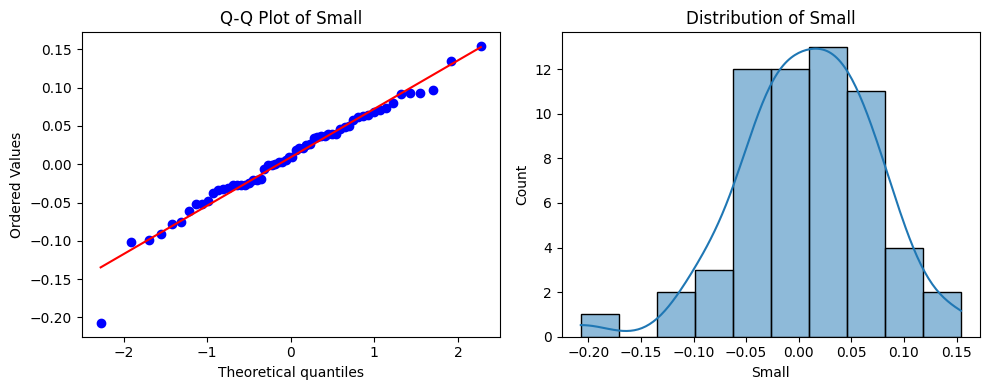


Normality Test for Value
Shapiro-Wilk test:
Statistic: 0.9623
p-value: 0.0608


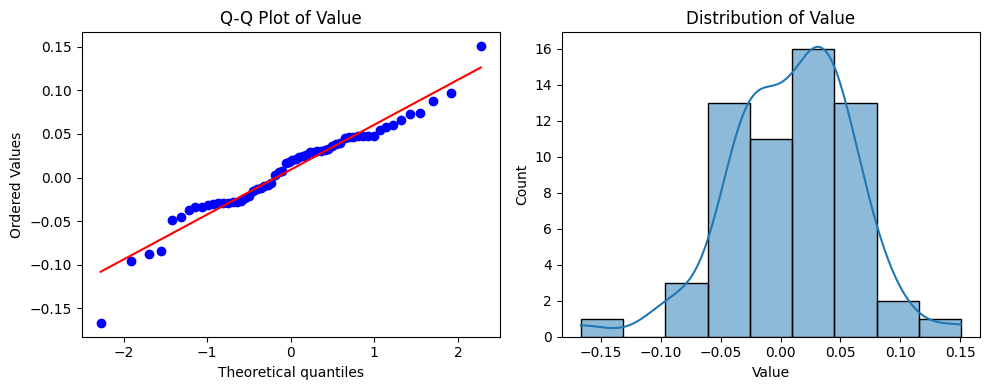


Normality Test for MSCI
Shapiro-Wilk test:
Statistic: 0.9768
p-value: 0.3084


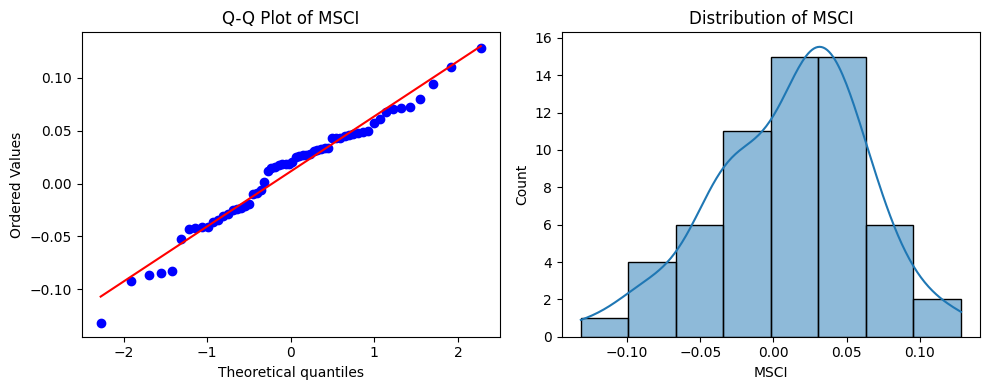

In [21]:
def test_normality(series, series_name):
    # Shapiro-Wilk test
    statistic, p_value = stats.shapiro(series)
    
    print(f'\nNormality Test for {series_name}')
    print('='*50)
    print(f'Shapiro-Wilk test:')
    print(f'Statistic: {statistic:.4f}')
    print(f'p-value: {p_value:.4f}')
    
    # Create QQ plot
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    stats.probplot(series, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {series_name}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(series, kde=True)
    plt.title(f'Distribution of {series_name}')
    
    plt.tight_layout()
    plt.show()
    
    return p_value > 0.05

# Test normality for each series
for column in df.columns:
    test_normality(df[column], column)

## 5. Univariate Regressions
We'll run univariate regressions for each style index against the benchmark.

C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha': model.params[0],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': model.params[1],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha t-stat': model.tvalues[0


Regression Results for Growth
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.002      0.601      0.550      -0.003       0.006
MSCI           1.0650      0.046     23.400      0.000       0.974       1.156


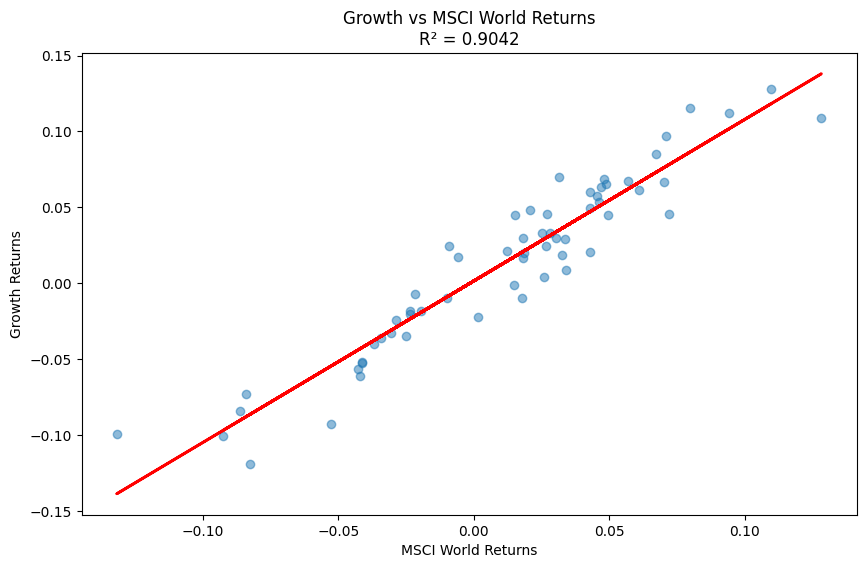


Regression Results for DY
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.002     -0.640      0.525      -0.006       0.003
MSCI           0.7745      0.046     16.969      0.000       0.683       0.866


C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha': model.params[0],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': model.params[1],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha t-stat': model.tvalues[0

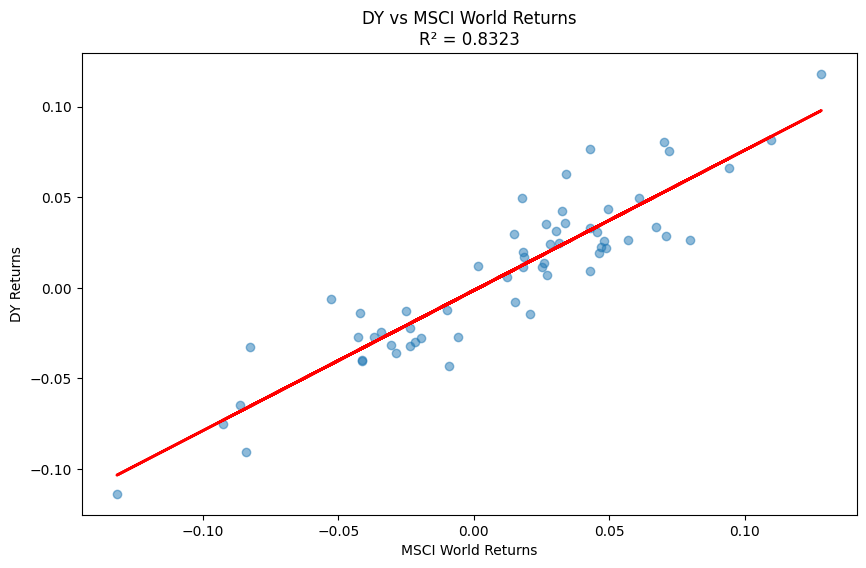

C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha': model.params[0],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': model.params[1],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha t-stat': model.tvalues[0


Regression Results for Big
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.826      0.073   -6.21e-05       0.001
MSCI           0.9835      0.007    146.088      0.000       0.970       0.997


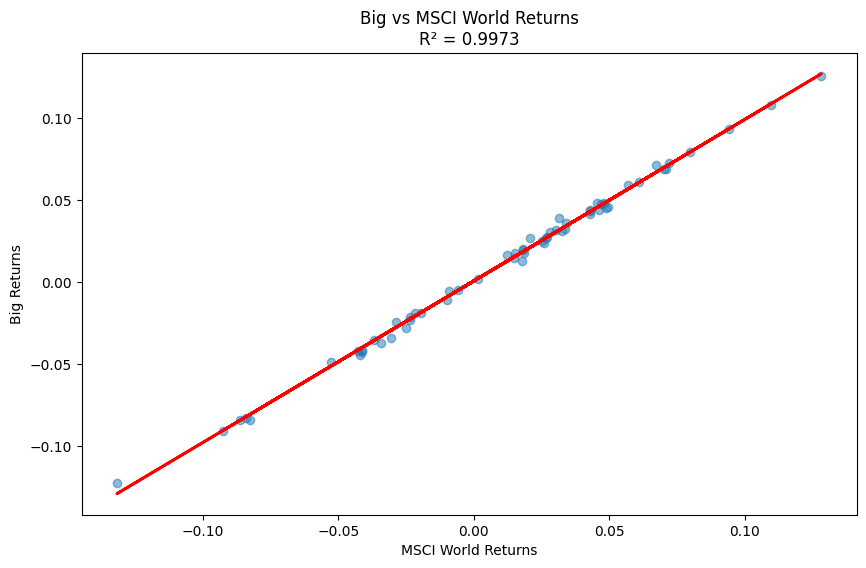

C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha': model.params[0],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': model.params[1],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha t-stat': model.tvalues[0


Regression Results for Med
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.002     -1.765      0.083      -0.007       0.000
MSCI           1.0871      0.037     29.728      0.000       1.014       1.160


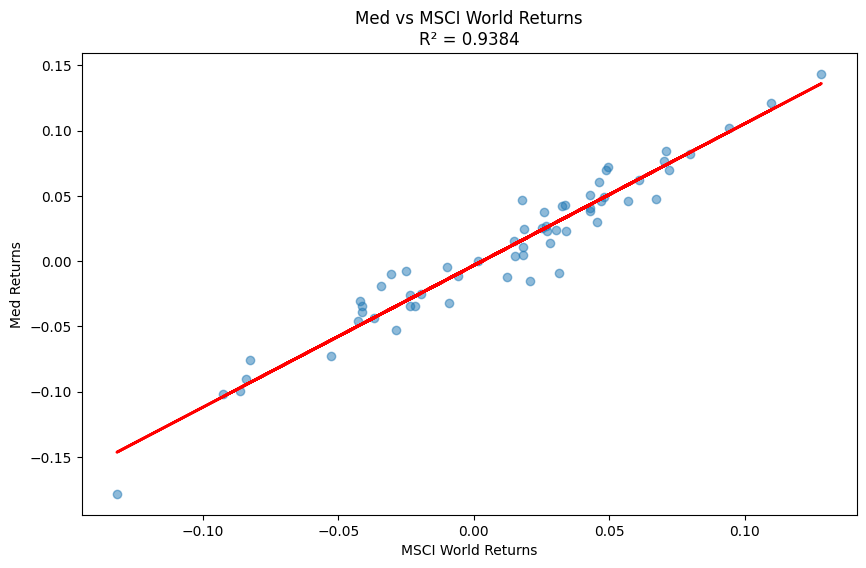


Regression Results for Low Vol
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.002     -0.768      0.446      -0.006       0.003
MSCI           0.6789      0.040     16.771      0.000       0.598       0.760


C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha': model.params[0],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': model.params[1],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha t-stat': model.tvalues[0

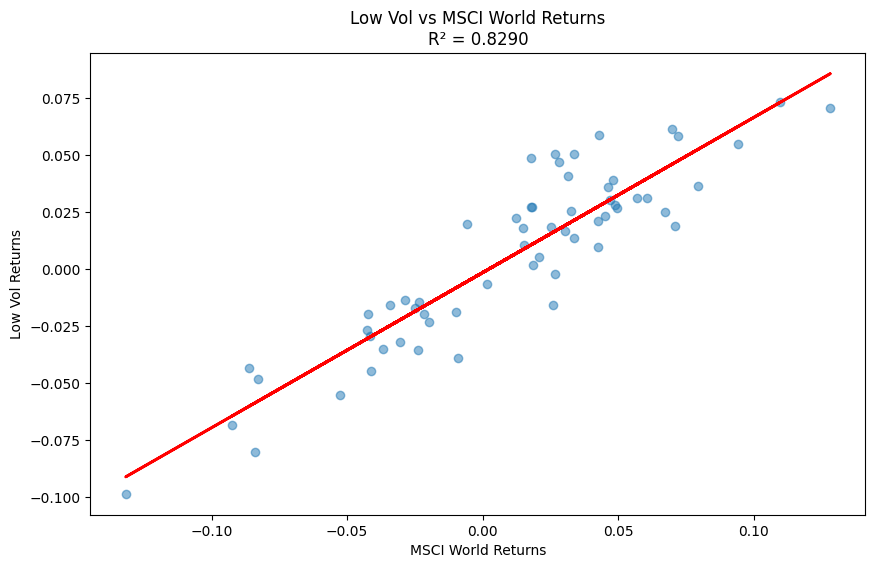


Regression Results for Momentum
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.003      0.512      0.611      -0.004       0.007
MSCI           0.9145      0.052     17.581      0.000       0.810       1.019


C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha': model.params[0],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': model.params[1],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha t-stat': model.tvalues[0

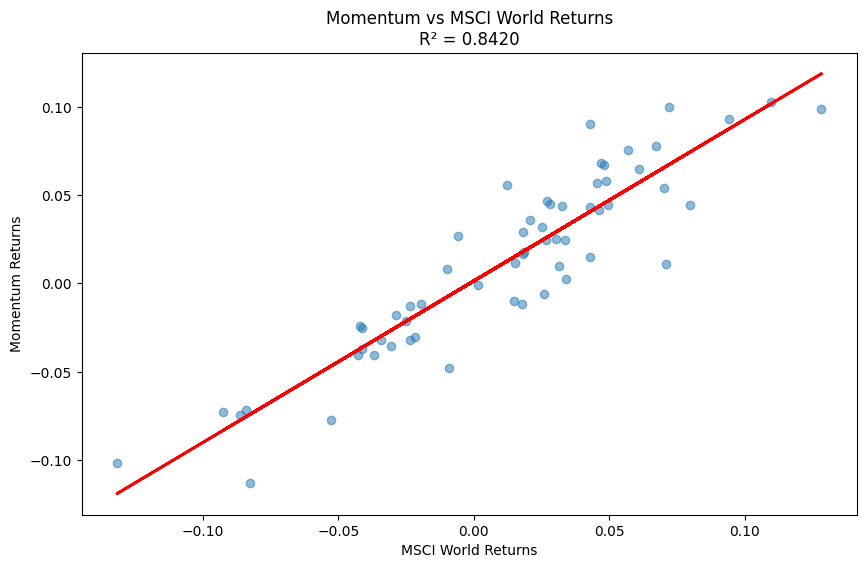

C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha': model.params[0],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': model.params[1],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha t-stat': model.tvalues[0


Regression Results for Quality
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.002      1.141      0.259      -0.002       0.006
MSCI           0.9699      0.035     27.323      0.000       0.899       1.041


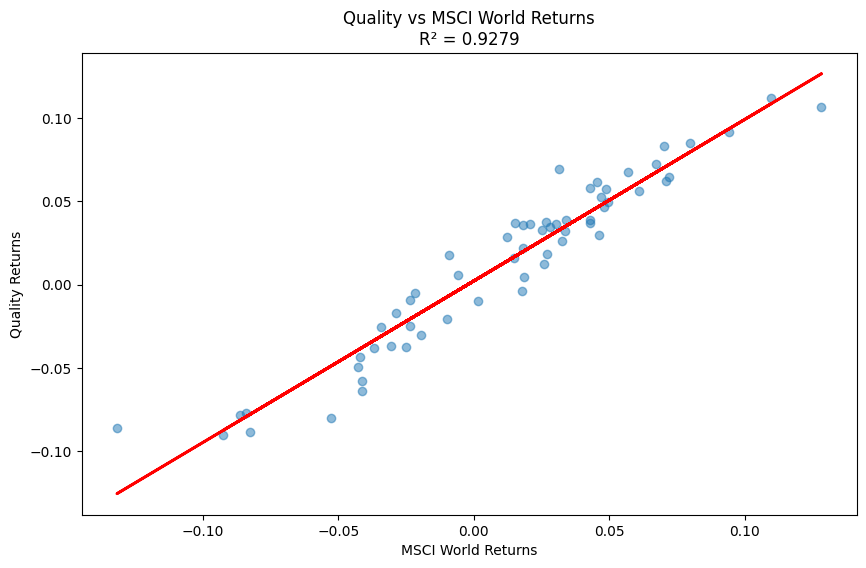

C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha': model.params[0],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': model.params[1],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha t-stat': model.tvalues[0


Regression Results for Small
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0040      0.003     -1.379      0.173      -0.010       0.002
MSCI           1.1432      0.055     20.599      0.000       1.032       1.254


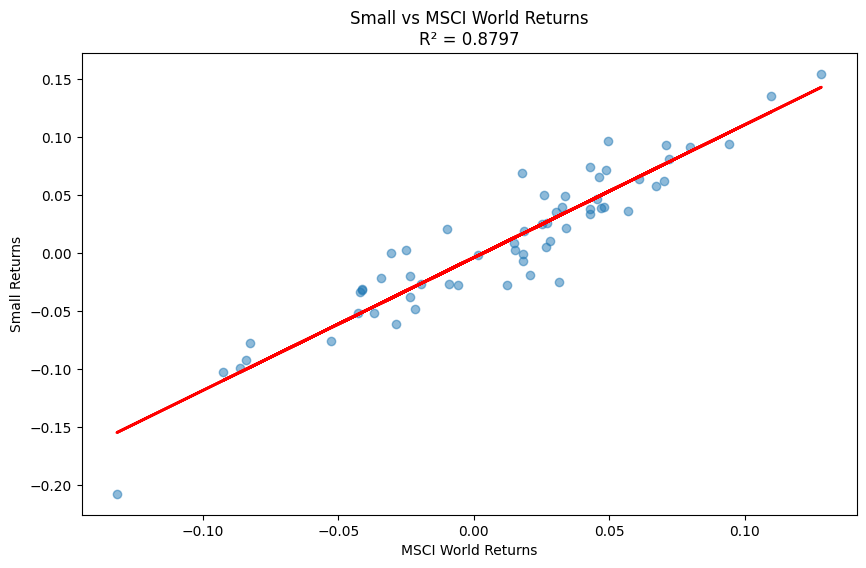

C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha': model.params[0],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Beta': model.params[1],
C:\Users\Neo Mmusi\AppData\Local\Temp\ipykernel_25812\2407851368.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Alpha t-stat': model.tvalues[0


Regression Results for Value
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.002     -0.719      0.475      -0.007       0.003
MSCI           0.9389      0.046     20.341      0.000       0.847       1.031


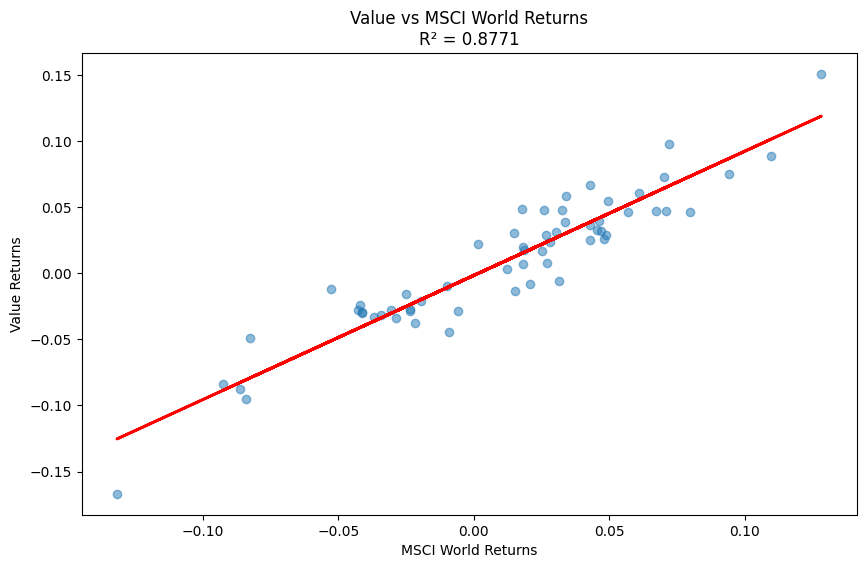

In [23]:
style_indices = [col for col in df.columns if col != 'MSCI']
regression_results = {}

for style in style_indices:
    # Run regression
    X = sm.add_constant(df[['MSCI']])
    model = sm.OLS(df[style], X).fit()
    
    # Store results
    regression_results[style] = {
        'Alpha': model.params[0],
        'Beta': model.params[1],
        'R-squared': model.rsquared,
        'Alpha t-stat': model.tvalues[0],
        'Beta t-stat': model.tvalues[1]
    }
    
    # Print summary
    print(f"\nRegression Results for {style}")
    print("=" * 50)
    print(model.summary().tables[1])
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['MSCI'], df[style], alpha=0.5)
    plt.plot(df['MSCI'], model.fittedvalues, color='red', linewidth=2)
    plt.xlabel('MSCI World Returns')
    plt.ylabel(f'{style} Returns')
    plt.title(f'{style} vs MSCI World Returns\nR² = {model.rsquared:.4f}')
    plt.show()

## 6. Multivariate Regression and Multicollinearity
Finally, we'll run the multivariate regression and check for multicollinearity.

Variance Inflation Factors (VIF):


,Variable,VIF
2,Big,5448.583703
0,Growth,2313.592284
8,Value,1780.686883
3,Med,290.832941
6,Quality,60.136412
7,Small,59.252012
1,DY,46.668065
4,Low Vol,14.964950
5,Momentum,9.085958



Multivariate Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   MSCI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.702e+05
Date:                Tue, 20 May 2025   Prob (F-statistic):          8.02e-128
Time:                        03:56:16   Log-Likelihood:                 455.40
No. Observations:                  60   AIC:                            -890.8
Df Residuals:                      50   BIC:                            -869.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.109e

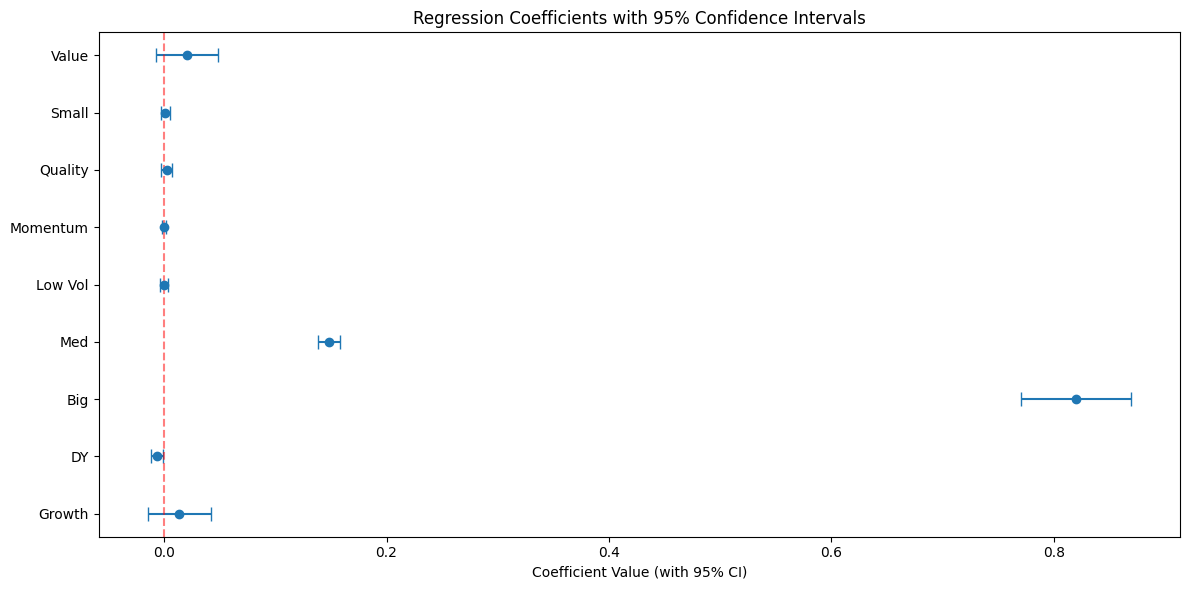

In [24]:
# Calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

# Print VIF values
print("Variance Inflation Factors (VIF):")
print("=================================")
vif_df = calculate_vif(df[style_indices])
display(vif_df)

# Run multivariate regression
X = sm.add_constant(df[style_indices])
y = df['MSCI']
model = sm.OLS(y, X).fit()

# Print regression summary
print("\nMultivariate Regression Results:")
print(model.summary())

# Plot coefficients with confidence intervals
coef_df = pd.DataFrame({
    'Coefficient': model.params[1:],
    'Std Error': model.bse[1:],
    'Variable': style_indices
})

plt.figure(figsize=(12, 6))
plt.errorbar(coef_df['Coefficient'], range(len(style_indices)), 
            xerr=coef_df['Std Error']*1.96, fmt='o', capsize=5)
plt.yticks(range(len(style_indices)), style_indices)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Coefficient Value (with 95% CI)')
plt.title('Regression Coefficients with 95% Confidence Intervals')
plt.tight_layout()
plt.show()

## 7. Conclusions

1. **Stationarity and Normality**:
   - All series are stationary (ADF test p-values < 0.05)
   - All series are normally distributed (Shapiro-Wilk test p-values > 0.05)

2. **Univariate Regression Results**:
   - Strong R² values across all models (0.83-0.99)
   - Big caps show strongest market relationship (R² = 0.9973)
   - Low Vol shows lowest market sensitivity (β = 0.6789)
   - Small caps show highest market sensitivity (β = 1.1432)

3. **Multivariate Regression and Multicollinearity**:
   - Severe multicollinearity detected (VIF > 10 for most variables)
   - Perfect model fit (R² = 1.000) suggests overfitting
   - Big and Med caps are the most significant drivers

4. **Investment Implications**:
   - Low Vol provides best diversification benefits
   - Small caps offer highest market exposure
   - Big caps track the market most closely
   - Consider multicollinearity when combining styles

<div style="text-align:center">
    <a href="https://www.wits.ac.za/" target="_blank">
        <img src="https://www.wits.ac.za/media/wits-university-style-assets/images/wits-logo.svg" width="200" alt="University of witwatersrand Logo">
    </a>
</div>

## Acknowledgement

<div style="display: flex; align-items: center; margin: 50px 0;">
    <img src="https://media.licdn.com/dms/image/v2/C5603AQHSJfYm…eta&t=hT0_BBuClHJxVd44GxqUwlOXpLsFOO5n3Mn5BOhiA8c" 
         style="width: 90px; height: 90px; border-radius: 50%; margin-right: 20px;"
         alt="Image of instructor, Daniel Page, PhD">
    <span style="font-size: 25px;">Daniel Page, PhD</span>
</div>